## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

## 
"""
Your code here (optional)
確認硬體資源
"""
nvidia-smi for Linux mac

In [33]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [34]:
train, test = keras.datasets.cifar10.load_data()

In [35]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x/255
    if flatten==True:
        x = x.reshape((len(x), -1))
    return x
                      
                      
def preproc_y(y,n = 10):
    if y.shape[-1]==1:
        y = keras.utils.to_categorical(y,n)
    return y

In [36]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [44]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,num_neurons=[512, 256, 128],output=10):
    input_layer = keras.layers.Input(input_shape)
    for i, units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=units,activation='relu',name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=units,activation='relu',name = 'hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output,activation='softmax',name='output')(x)

    model = keras.models.Model(inputs= [input_layer],output=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\Xuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.9605 - acc: 0.2934 - val_loss: 1.7889 - val_acc: 0.3623
Epoch 2/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.7134 - acc: 0.3895 - val_loss: 1.6704 - val_acc: 0.4038
Epoch 3/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.6333 - acc: 0.4173 - val_loss: 1.5637 - val_acc: 0.4418
Epoch 4/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.5664 - acc: 0.4423 - val_loss: 1.5408 - val_acc: 0.4502
Epoch 5/100
50000/50000 [==============================] - 5s 90us/step - loss: 1.5142 - acc: 0.4588 - val_loss: 1.5820 - val_acc: 0.4319
Epoch 6/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.4789 - acc: 0.4742 - val_loss: 1.5059 - val_acc: 0.4658
Epoch 7/100
50000/50000 [==============================] - 4s 90us/step - loss: 1.4477 - acc: 0.4839 - val_loss: 1.4761 -

50000/50000 [==============================] - 4s 80us/step - loss: 0.5644 - acc: 0.7958 - val_loss: 2.0010 - val_acc: 0.5081
Epoch 60/100
50000/50000 [==============================] - 4s 83us/step - loss: 0.5653 - acc: 0.7978 - val_loss: 1.9443 - val_acc: 0.5108
Epoch 61/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.5415 - acc: 0.8064 - val_loss: 2.0842 - val_acc: 0.5045
Epoch 62/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.5458 - acc: 0.8030 - val_loss: 2.0040 - val_acc: 0.5128
Epoch 63/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.5192 - acc: 0.8169 - val_loss: 2.0947 - val_acc: 0.5071
Epoch 64/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.5289 - acc: 0.8125 - val_loss: 2.0671 - val_acc: 0.5074
Epoch 65/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.5079 - acc: 0.8199 - val_loss: 2.0819 - val_acc: 0.5054
Epoch 66/100
50000/50000 [==============

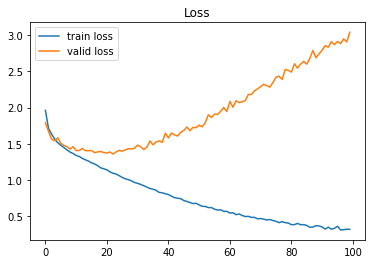

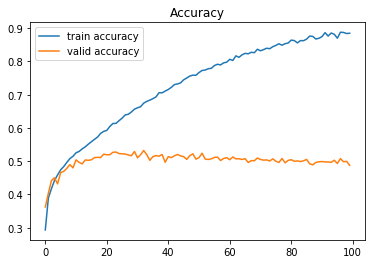

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()